# Project 2：NASA Data Acquisation, Visualization, and Analysis

In [1]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the NASA API and Data Collection

- Register for a NASA API key and understand the different types of data that the API provides.
- Run the Python script below to fetch data about **Near Earth Objects (NEOs)** from the NASA API for a years data.
- Extract and understand the different pieces of data provided for each NEO.

In [2]:
import requests
import time
from datetime import datetime, timedelta
from getpass import getpass
"""
# Set your NASA API KEY, this step asks you to enter your API KEY.
# (The input box may be float in the top on your editor.)
api_key = getpass()"""

'\n# Set your NASA API KEY, this step asks you to enter your API KEY.\n# (The input box may be float in the top on your editor.)\napi_key = getpass()'

In [3]:
"""
# Set the start and end dates for the data you want to fetch

start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
num_days = 21
end_date = start_date + timedelta(days=num_days)  # 1 year later
# change above to full year!
# Initialize a list to store the data
data = []

# Fetch data from the NASA API 7 days at a time
# The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"
# You can look into the example query in the link below to see what the data look like:
# https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY
current_date = start_date
while current_date < end_date:
    next_date = min(current_date + timedelta(days=7), end_date)
    print("Current date: ", current_date)
    print("Next date: ", next_date)
    response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
    data.append(response.json())
    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit

# Now 'data' contains the NEO data for the 1-year period
print(data)"""

'\n# Set the start and end dates for the data you want to fetch\n\nstart_date = datetime.strptime(\'2022-01-01\', \'%Y-%m-%d\')\nnum_days = 21\nend_date = start_date + timedelta(days=num_days)  # 1 year later\n# change above to full year!\n# Initialize a list to store the data\ndata = []\n\n# Fetch data from the NASA API 7 days at a time\n# The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"\n# You can look into the example query in the link below to see what the data look like:\n# https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY\ncurrent_date = start_date\nwhile current_date < end_date:\n    next_date = min(current_date + timedelta(days=7), end_date)\n    print("Current date: ", current_date)\n    print("Next date: ", next_date)\n    response = requests.get(f\'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key=

In [3]:

import json

f = open('Ayears_Data.json')
num_days = 139


In [4]:

data = json.load(f)

# Save the data as a JSON file
#with open('20_weeks.json', 'w') as file:
    #json.dump(data, file)



In [5]:
# Check the date coverage of your data.
dates_contained_in_data = []
for d in data:
    dates_contained_in_data += list(d['near_earth_objects'].keys())

print(sorted(dates_contained_in_data))

['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022

In [6]:
from src.utils import get_a_random_chunk_property

In [7]:
get_a_random_chunk_property(data)

date: 2022-02-05
NEO name: (2015 VJ64)
name: (2015 VJ64)


For the remaining tasks, you have to organize the data as pd.DataFrame so as to suit the specific need in each task. This part may require a considerably amount of efforts, which is normal in data science and analytics works.

### Task 2: Data Analysis

- Calculate the average size of the NEOs for each day.
- Determine the proportion of NEOs that are potentially hazardous.
- Find the NEO with the closest approach distance for each day.
- Use statistical methods to analyze the data. For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. Determine if the size of a NEO is correlated with whether it is potentially hazardous.

In [9]:
#Printing the data as json type:

#print(json.dumps(data, indent=4))  # indent=4 for pretty printing

In [8]:

## Data was as list and here we convert the data list into a dictionary:

data_dict = {}
print(len(data))
for item in data:
    for date, neos in item['near_earth_objects'].items():
        if date not in data_dict:
            data_dict[date] = []
        data_dict[date].extend(neos)

# To check the date coverage of the data.
dates_contained_in_data = list(data_dict.keys())

def calculate_average_neo_size(data):
    # To create a dictionary to store the average size of NEOs for each day
    average_sizes = {}

    # Iterate over each day in the data
    for date, neos in data.items():
        neo_sizes = []

        # Iterate over each NEO for the current day and calculate its size
        for neo in neos:
            # Take the average of the estimated diameter min and max values for each NEO
            neo_size = (neo['estimated_diameter']['meters']['estimated_diameter_min'] + 
                        neo['estimated_diameter']['meters']['estimated_diameter_max']) / 2.0
            neo_sizes.append(neo_size)

        # Calculate the average size for the current day
        average_size = sum(neo_sizes) / len(neo_sizes)

        # Store the average size for the current day in the dictionary
        average_sizes[date] = average_size

    return average_sizes

average_sizes = calculate_average_neo_size(data_dict)
#average_sizes = dict(sorted(average_sizes.items()))

print(json.dumps(average_sizes, indent=4))


53
{
    "2022-01-07": 136.41669499568053,
    "2022-01-08": 188.92085962588465,
    "2022-01-03": 28.178929422507142,
    "2022-01-04": 80.17934406791666,
    "2022-01-05": 177.14896709935002,
    "2022-01-06": 193.03476659451002,
    "2022-01-01": 164.06950632386742,
    "2022-01-02": 113.28381130161922,
    "2022-01-09": 92.33174888921,
    "2022-01-14": 273.76014224774707,
    "2022-01-15": 94.58464650387778,
    "2022-01-10": 129.81800097843333,
    "2022-01-11": 91.59207763346748,
    "2022-01-12": 102.13785365849286,
    "2022-01-13": 136.8484155214075,
    "2022-01-18": 206.4277140964094,
    "2022-01-19": 101.74826853529001,
    "2022-01-16": 111.76921471553334,
    "2022-01-17": 252.19978835415202,
    "2022-01-21": 202.15950938433684,
    "2022-01-22": 134.2432870377,
    "2022-01-20": 113.04951510122729,
    "2022-01-29": 298.8924781469559,
    "2022-01-25": 202.90064994384474,
    "2022-01-26": 93.43305810566112,
    "2022-01-27": 123.68635149364735,
    "2022-01-28": 113.

In [9]:
# Write your code
import pandas as pd

# data is a list of dicts containing json response data
# DATA TYPE: <class 'list'>
# DATA0 TYPE: <class 'dict'>
# NEO TYPE: <class 'dict'>
# INDEX TYPE <class 'tuple'>
# temp_df is a pandas dataframe
# write down what data types are needed!

#print("Num of days used: ", num_days)
#print("Num of weeks used:", int(num_days/7))
for val in range(int(num_days/7)): # convert to num of weeks
    neo = data[val]['near_earth_objects']
    for neo_object in sorted(neo.items()):
        print("Date:", neo_object[0])
        temp_df = pd.json_normalize(neo, record_path=neo_object[0])
        # print(temp_df.head())
        # print(temp_df['absolute_magnitude_h'].describe())

        # hazardous asteroid calculations
        df_dangerous_false = len(temp_df[temp_df['is_potentially_hazardous_asteroid']==False])
        df_dangerous_true = len(temp_df[temp_df['is_potentially_hazardous_asteroid']==True])
        print(" Dangerous:", df_dangerous_true)
        print(" Non-dangeorus:", df_dangerous_false)
        print("     Proportion:", 100*df_dangerous_true/df_dangerous_false, "%")

        # yet to expand near miss data


# df = pd.DataFrame(data)
# df.describe()
# below just for reference
temp = {
    'links': {
        'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-08&end_date=2022-01-15&detailed=false&api_key=DEMO_KEY',
        'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2021-12-25&end_date=2022-01-01&detailed=false&api_key=DEMO_KEY',
        'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-08&detailed=false&api_key=DEMO_KEY'
    },
    'element_count': 125,
    'near_earth_objects': {
        '2022-01-07': [{
            'links': {
                'self': 'http://api.nasa.gov/neo/rest/v1/neo/2216523?api_key=DEMO_KEY'
            },
            'id': '2216523',
            'neo_reference_id': '2216523',
            'name': '216523 (2001 HY7)',
            'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523',
            'absolute_magnitude_h': 20.7,
            'estimated_diameter': {
                'kilometers': {
                    'estimated_diameter_min': 0.1925550782,
                    'estimated_diameter_max': 0.4305662442
                },
                'meters': {
                    'estimated_diameter_min': 192.5550781879,
                    'estimated_diameter_max': 430.566244241
                },
                'miles': {
                    'estimated_diameter_min': 0.1196481415,
                    'estimated_diameter_max': 0.2675413778
                },
                'feet': {
                    'estimated_diameter_min': 631.7424027221,
                    'estimated_diameter_max': 1412.6189567557
                }
            },
            'is_potentially_hazardous_asteroid': True,
            'close_approach_data': [{
                'close_approach_date': '2022-01-07',
                'close_approach_date_full': '2022-Jan-07 06:54',
                'epoch_date_close_approach': 1641538440000,
                'relative_velocity': {
                    'kilometers_per_second': '13.0121884925',
                    'kilometers_per_hour': '46843.8785729622',
                    'miles_per_hour': '29106.9644388498'
                },
                'miss_distance': {
                    'astronomical': '0.3880911625',
                    'lunar': '150.9674622125',
                    'kilometers': '58057611.275823875',
                    'miles': '36075326.811664475'
                },
                'orbiting_body': 'Earth'
            }],
            'is_sentry_object': False
        }]
    }
}
# print("TEMP TYPE:", type(temp))

# new_df = pd.concat([pd.DataFrame(pd.json_normalize(x)) for x in df['near_earth_objects']],ignore_index=True)
# print(new_df)
# characteristics_df = 
# approach_df = 
# print()

Date: 2022-01-01
 Dangerous: 3
 Non-dangeorus: 20
     Proportion: 15.0 %
Date: 2022-01-02
 Dangerous: 0
 Non-dangeorus: 13
     Proportion: 0.0 %
Date: 2022-01-03
 Dangerous: 0
 Non-dangeorus: 14
     Proportion: 0.0 %
Date: 2022-01-04
 Dangerous: 1
 Non-dangeorus: 8
     Proportion: 12.5 %
Date: 2022-01-05
 Dangerous: 2
 Non-dangeorus: 13
     Proportion: 15.384615384615385 %
Date: 2022-01-06
 Dangerous: 2
 Non-dangeorus: 18
     Proportion: 11.11111111111111 %
Date: 2022-01-07
 Dangerous: 4
 Non-dangeorus: 14
     Proportion: 28.571428571428573 %
Date: 2022-01-08
 Dangerous: 1
 Non-dangeorus: 12
     Proportion: 8.333333333333334 %
Date: 2022-01-08
 Dangerous: 1
 Non-dangeorus: 12
     Proportion: 8.333333333333334 %
Date: 2022-01-09
 Dangerous: 0
 Non-dangeorus: 15
     Proportion: 0.0 %
Date: 2022-01-10
 Dangerous: 2
 Non-dangeorus: 13
     Proportion: 15.384615384615385 %
Date: 2022-01-11
 Dangerous: 0
 Non-dangeorus: 20
     Proportion: 0.0 %
Date: 2022-01-12
 Dangerous: 1
 Non-

In [12]:

#Use statistical methods to analyze the data. 
#For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. 
#Determine if the size of a NEO is correlated with whether it is potentially hazardous.

import statistics
import numpy as np
def analyze_neo_data(data):
    neo_sizes = []
    is_hazardous = []

    for item in data:
        for date, neos in item['near_earth_objects'].items():
            for neo in neos:
                size = neo['estimated_diameter']['meters']['estimated_diameter_max']
                is_potentially_hazardous = neo['is_potentially_hazardous_asteroid']

                neo_sizes.append(float(size))
                is_hazardous.append(is_potentially_hazardous)

    mean_size = statistics.mean(neo_sizes)
    median_size = statistics.median(neo_sizes)
    mode_size = statistics.mode(neo_sizes)
    std_dev = statistics.stdev(neo_sizes)

    hazardous_neo_sizes = [size for size, hazardous in zip(neo_sizes, is_hazardous) if hazardous]
    non_hazardous_neo_sizes = [size for size, hazardous in zip(neo_sizes, is_hazardous) if not hazardous]

    correlation = np.corrcoef(neo_sizes, is_hazardous)[0, 1]

    analysis_result = {
        'mean_size': mean_size,
        'median_size': median_size,
        'mode_size': mode_size,
        'std_dev': std_dev,
        'correlation': correlation,
        'hazardous_neo_sizes': hazardous_neo_sizes,
        'non_hazardous_neo_sizes': non_hazardous_neo_sizes
    }

    return analysis_result


result = analyze_neo_data(data)
print(json.dumps(result, indent=4))

{
    "mean_size": 206.5600848883334,
    "median_size": 76.5667086792,
    "mode_size": 35.8129403019,
    "std_dev": 398.90280061079693,
    "correlation": 0.264377155646347,
    "hazardous_neo_sizes": [
        430.566244241,
        416.9077599521,
        688.7156928262,
        676.1452147577,
        303.4170480479,
        317.7166529762,
        783.5017643338,
        676.1452147577,
        284.4722965033,
        446.7247132921,
        1175.0057145608,
        247.7650126055,
        300.6353038309,
        303.4170480479,
        409.2983357621,
        317.7166529762,
        320.6564489709,
        337.3183589129,
        1563.2915440869,
        337.3183589129,
        307.6379996423,
        559.8091320902,
        2767.1963666501,
        303.4170480479,
        552.1282628496,
        284.4722965033,
        320.6564489709,
        337.3183589129,
        316.2568775553,
        1458.9485569187,
        274.1826557868,
        287.1044862548,
        358.1294030194,

### Task 3: Data Visualization Part A

- Create a line plot of the number of NEOs per week.
- Create a histogram of the distribution of NEO sizes.
- Create a bar plot of the average NEO size per week.
- Use a library like Seaborn to create more complex visualizations, such as a box plot of the NEO sizes or a heat map of the number of NEOs per week. **Be creative**!

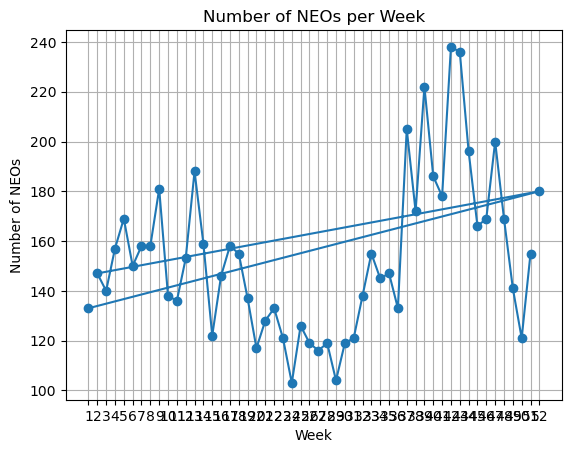

Number of NEOs in Week 1: 133


NameError: name 'df' is not defined

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_neo_data(data):
    neos_per_week = {}

    for item in data:
        for date, neos in item['near_earth_objects'].items():
            week_start_date = pd.to_datetime(date)
            week_end_date = week_start_date + pd.DateOffset(days=6)
            week_number = week_start_date.week
            week_str = f"Week {week_number}"

            if week_number in neos_per_week:
                neos_per_week[week_number] += len(neos)
            else:
                neos_per_week[week_number] = len(neos)

    return neos_per_week

def plot_neos_per_week(neos_per_week):
    df = pd.DataFrame.from_dict(neos_per_week, orient='index', columns=['NEOs'])

    plt.plot(df.index, df['NEOs'], marker='o')
    plt.xlabel('Week')
    plt.ylabel('Number of NEOs')
    plt.title('Number of NEOs per Week')
    plt.xticks(df.index)
    plt.grid(True)
    plt.show()

neos_per_week = analyze_neo_data(data)
plot_neos_per_week(neos_per_week)

week_1_neos = neos_per_week.get(1 ,0)
print(f"Number of NEOs in Week 1: {week_1_neos}")


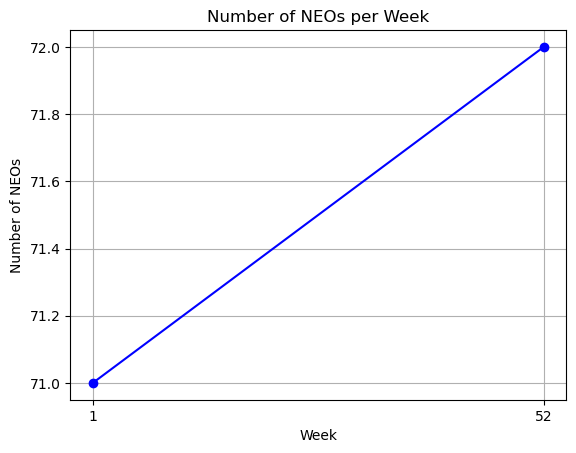

Number of NEOs in Week 1: 71


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_neo_data(data):
    neos_per_week = {}

    for date, neos in item['near_earth_objects'].items():
        week_number = pd.to_datetime(date).week
        neos_per_week[week_number] = item['element_count']
        item['element_count'] -= 1

    return neos_per_week

def plot_neos_per_week(neos_per_week):
    df = pd.DataFrame.from_dict(neos_per_week, orient='index', columns=['NEOs'])

    plt.plot(df.index, df['NEOs'], marker='o', linestyle='-', color='b')
    plt.xlabel('Week')
    plt.ylabel('Number of NEOs')
    plt.title('Number of NEOs per Week')
    plt.xticks(df.index)
    plt.grid(True)
    plt.show()
    
    
neos_per_week = analyze_neo_data(data)
plot_neos_per_week(neos_per_week)

week_1_neos = neos_per_week.get(1, 0)
print(f"Number of NEOs in Week 1: {week_1_neos}")
    

### Task 4: Data Visualization Part B

- Create a pie chart of the proportion of hazardous vs non-hazardous NEOs.
- Create a scatter plot of the correlation between NEO size and close approach distance.
- Customize the appearance of your plots (e.g., colors, labels, titles).
- Create interactive visualizations using a library like Plotly. For example, create an interactive scatter plot where you can hover over each point to see more information about the NEO. **Be creative!**

In [99]:
# Write your code

### Task 5: Interpretation of Results

- Interpret the results of your data visualization in part A and B. 
- What insights can you gain about NEOs from your results? Summarizing your findings.
- Use your findings to make predictions or recommendations. For example, if you found that larger NEOs are more likely to be potentially hazardous, you could recommend that more resources be allocated to tracking large NEOs. **Be creative!**
- Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.

In [ ]:
# Write your code

### Task 6: Presentation and Documentation

- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This should include an overview of your work, the results of your data analysis, and the insights you gained from your results.